# Oppgaver for hånd 

**Oppgave 1** 

Gitt funksjonen $f(x)=|x|, -1\leq x \leq 1$, estimer integralet $\int_{-1}^1 f(x) dx$ på tre måter:

a) Nøyaktig med å dele integralet opp i to intervaller. 

b) Med å bruke venstre Riemannsum med 2 intervaller.

c) Med trapesregelen med partisjonen $x={-1, 0, 1}$

d) Midtpunktmetoden med samme partisjon

e) Med Simpsons regel med samme partisjon

f) Forklar geometrisk hvorfor metodene fungerer på dette eksempelet. 


**Oppgave 2**

a)
Beregn integralet  
$\int_{0}^{2} (x^2 + 1)\,dx$  
ved hjelp av:  
- Venstresummen med 4 delintervaller  
- Høyresummen med 4 delintervaller  


b) Beregn integralet  
$\int_{0}^{1} \cos(x)\,dx$ 
med midtpunktmetoden og 2 delintervaller.  
Sammenlign med eksakt verdi \( \sin(1) \).


c) Beregn integralet $\int_{1}^{3} \frac{1}{x}\,dx$  
med trapesmetoden og 4 delintervaller.  
Sammenlign med eksakt verdi \( \ln(3) - \ln(1) \).


d) Beregn integralet  
$\int_{0}^{2} e^x\,dx$  
med Simpsons regel og 3 delintervaller.  
Sammenlign med eksakt verdi \( e^2 - 1 \).


# Kodeoppgaver

**Oppgave 3 - Estimere integraler**

TIPS: Skriv en funksjon som gjør hver av metodene. Funksjonen kan ta inn x-verdier og en funksjon som skal integreres. 

a) Numerisk integrer $f(x) = e^{-x^2}$
   på intervallet $[-2,2]$ med:  
   - Trapesmetoden  
   - Midtpunktmetoden  
   - Simpsons regel  (denne er ferdig kodet som eksempel)

b) Integrer $h(x) = \sin(x)$ på intervallet $[0,\pi]$ med alle tre metodene og 8 delintervaller.

c) Beregn integralet $\int_{1}^{3} \frac{1}{x}\,dx$ med trapesmetoden og 4 delintervaller.  
Sammenlign med eksakt verdi $\ln(3) - \ln(1)$ (den naturlige logaritmen finnes i numpy som np.log(a) )

d) Beregn integralet $\int_{0}^{2} e^x\,dx$ 
med Simpsons regel og 4 delintervaller.  
Sammenlign med eksakt verdi $e^2 - 1$


In [7]:
import numpy as np
import matplotlib.pyplot as plt 

# ---- Legg eventuelle funksjoner her ----
def f(x):
    return np.exp(-x**2)

def h(x):
    return np.sin(10*x)

def i(x):
    return 1/x 

def j(x):
    return np.exp(x)

def simpsonsRegel(f, xs):
    """
    Funksjonen tar inn en funksjon "f" som skal integreres. I python er dette navnet på en definert funksjon.
    xs er en liste endepunktene for hvert delintervall som skal integreres.  
    """
    dx = xs[1] - xs[0]
    
    # I simpsons metode må vi hoppe 2 punkt om gangen. Det er på grunn av metoden regner ut 2 delintervaller om gangen.
    integral = sum( dx/3 * (f(xs[0:-2:2]) + 4*f(xs[1:-1:2]) + f(xs[2::2])) ) # Leses som f(x_i) + 4*f(x_i+1) + f(x_i+2)
    return integral


# ---- Bearbeid dataene her ----

# a) 
x0 = -2
x1 =  2
N = 101 # 100 delintervall
xsA = np.linspace(x0, x1, N)
aSimpsonsIntegral = simpsonsRegel(f, xsA) 


print("Integralet til f(x)=e^(-x^2) mellom -2 og 2 er: ")
print(f"Ifølge Simpsons regel: {aSimpsonsIntegral}")

# ---- Plot eventuelt her ----





Integralet til f(x)=e^(-x^2) mellom -2 og 2 er: 
Ifølge Simpsons regel: 1.7641627606841819


**Oppgave 4 - Øving på ulike funksjoner** 

a) 
   Numerisk integrer $f(x) = e^{-x^2}$ på intervallet $[-2,2]$ med:  
   - Trapesmetoden  
   - Midtpunktmetoden  
   - Simpsons regel  
   Bruk 20 delintervaller og sammenlign med sann verdi.

b) 
   Integrer $f(x) = \sin(10x)$ på intervallet $[0,\pi]$ med alle tre metodene og med 20, 50 og 100 delintervaller.  
   Diskuter hvilken metode som håndterer oscillasjonene best.

1.7636776215975505


Text(0.5, 1.0, 'Opg 5b) y=sin(10x)')

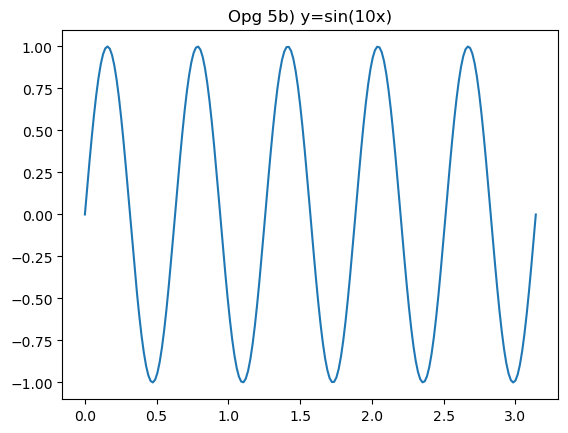

In [6]:
# ---- Plasser funksjoner her ----

def f_a(x):
    return np.exp(-x**2)

def f_b(x):
    return np.sin(10*x)

def riemannVenstre(f, xs):
    """
    Estimerer integralet til f fra x0 til x1 med:
    integral = f(x0) * (x1-x0)
    """
    h = xs[2]-xs[1]
    integral = sum(f(xs[0:-1]))*h  # Legg sammen alle venstre funksjonsverdier
    return integral

# ---- Gjør beregninger her ----

x0 = -2 
x1 =  2
N = 20 + 1 # Blir et ekstra punkt siden vi skal ha 20 intervaller

xs = np.linspace(x0, x1, N)

estRiemannVenstre = riemannVenstre(f_a, xs) # Merk at i Python kan man gi en funksjon til en annen funksjon

print(estRiemannVenstre)



# ----- Plots -----
fig, ax = plt.subplots()
x = np.linspace(0, np.pi, 200)
y = f_b(x)
ax.plot(x, y)
ax.set_title("Opg 5b) y=sin(10x)")




**Oppgave 5 - Estimere feilleddet**

I denne oppgaven skal vi estimere feilleddet til 4 ulike metoder. 

Gitt funksjonen $f(x)=x+cos(x), x\in[0, 2\pi]$, og partisjonen $x_i = i\frac{2\pi}{N}, \quad i\in[0,N]$ skal vi estimere integralet $\int_0^{2\pi}f(x)dx=2\pi^2$

a) Skriv en funksjon som tar inn en N punkt $x$ og en funksjon $f$, for så å estimere integralet ved hjelp av midtpunktsmetoden.

b) Regn ut feilen til metoden for ulike verdier av N. 

Legg merke til at hvis feilen til en metode er av grad $n$, så kan feilen skrives som: $|L_i - I| = |E_i| = O(h_i^n)$, hvor L er estimatet vårt, I er den ekte løsningen, og $h$ er steglengden vår. 
Hvis vi f.eks. halverer steglengden vil feilen da bli: $|L_{i+1} - I|=|E_{i+1}|=O(h_{i+1}^n)=O(h_i^n / 2^n)$
Regner vi ut $|E_i|/|E_{i+1}|=O(2^n)$ og deretter tar logaritmen kan vi få:

$n \ln(2) = ln(|E_i| / |E_{i+1}|)$ eller at $n=ln(|E_i| / |E_{i+1}|)/ln(2)$ 

Altså kan graden til metoden estimeres fra feilene våre etterhvert som vi tar mindre og mindre steg. 

c) Bruk dette til å estimere graden til trapesmetoden

d) Implementer trapesmetoden og estimer hvilket grad den har

e) Sammenlign feilene til midtpunktsmetoden og trapesmetoden. Er en av dem bedre enn den andre? 

f) Implementer Simpsons regel og estimer hvilket grad den har

g) Lagre alle feilene til de ulike metodene i en liste. Gjør det samme med de tilsvarende steglengdene. Plot så alt i et log-log plot med hjelp av plt.loglog(x,y). Hva ser du da?

In [ ]:
import numpy as np
# ----- Lag funksjoner her -----

def f(x):
    return x + np.cos(x)

def midtpunktMetoden(f, xs):
    integral = 0
    return integral 

def trapesMetoden(f, xs):
    integral = 0
    return integral

def simpsonsRegel(f, xs):
    integral = 0
    return integral


# ----- Gjør utregninger her -----
rettIntegral = 2*np.pi**2

x0 = 0
x1 = 2*np.pi

hs = (x1 - x0) / (2**np.arange(1, 10)) # Steglengde 2pi/2, 2pi/4, 2pi/8 osv

for h in hs:
    # Finn antall punkt. Pluss på 1 fordi vi skal ha med starten 0.
    N = round((x1-x0)/h) + 1

    # Lag partisjonen for denne steglengden
    xs = np.linspace(x0, x1, N)

    # Estimerer integralet
    estMidtPunkt = midtpunktMetoden(f, xs)

    # Regner ut feilen
    feilMidtPunkt = np.abs(rettIntegral - estMidtPunkt)

    

    print(feilMidtPunkt)


**Oppgave 6 - vann i en elv**

For å varsle om flomfare har en kommune satt opp en vannmåler langt oppi en elv. Den måler hvor mange liter per sekund som renner gjennom elven. 

De har satt en grense at om det renner mer enn 40 000 m^3 vann gjennom elven iløpet av en time må det sendes ut varsel. 

I løpet av en time kom målingene som står i koden under inn. Målingene er tatt bare tatt hvert femte minutt.

a) Plot dataene 

b) Hvis du approksimerer $\int_0^{3600} q(t)dt$ med trapesmetoden, hvor mange kubikk med vann flyter gjennom elven? 

c) Hva hvis du bruker Simpsons regel? 

d) En geolog forteller deg at vannføringen endrer seg raskt mellom målepunktene – kurven “bøyer” seg kraftig flere steder. Diskuter hvilken metode (trapes eller Simpsons) som sannsynligvis gir mest nøyaktig resultat, og hvorfor.

e) En kollega av deg tipser deg om at midtpunktsmetoden har mindre feil enn trapesmetoden, og at gaussisk kvadratur er mer nøyaktig enn begge. Hvorfor kan ikke disse metodene brukes i denne situasjonen?


In [ ]:
# ---- Legg eventuelle funksjoner her ----



# ---- Bearbeid dataene her ----
t = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60] # Tiden i minutter
q = [367.6, 651.7, 1215, 1454, 1.1308, 980.3, 1491, 1920, 1537, 868.3, 696.8, 837.4, 729.4] # Vann som renner gjennom i L/s

**Oppgave 7 - Gaussisk kvadratur**




In [ ]:
import numpy as np



def transform_interval(x, a, b):
"""
Map quadrature nodes from [-1,1] to [a,b].
"""
return 0.5 * (b - a) * x + 0.5 * (b + a)


def gauss_quadrature(f, N, a, b):
# Estmerer integralet til f fra a til b, med hjelp av N punkt valgt fra Gaussisk kvadrature


# Finner de N x-verdiene for Gaussisk kvadratur, samt vektene deres.
# x-verdiene er fra [-1, 1], og vil senere bli gjort til [a, b]
x, w = np.polynomial.legendre.leggauss(N)


# Gjør om punktene fra [-1, 1] til [a, b]
x = 0.5 * (b - a) * x + 0.5 * (b + a)

# Regner ut integralet med hjelp av funksjonsverdiene og vektene
integral = sum(f(x)*w * (b-a)/2)

return integral